In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
import torch
from torch.autograd import Variable
from IPython.display import clear_output

images = np.load('images.npy')
labels = np.load('labels.npy')
num_images,height,width = np.shape(images)
images = images.astype(float)
images = np.reshape(images,(num_images,height*width))/255.0
np.shape(images)
print(num_images)

labels = labels.astype(int)
labels[labels!=0]=-1
labels[labels==0]=1
labels[labels==-1]=0

print(labels)



50000
[0 1 1 ..., 0 0 0]


In [86]:
x_valid = images[0:5000][:]
print(np.shape(x_valid))
y_valid = labels[0:5000]
print(np.shape(y_valid))

x_train = images[0:40000][:]
print(np.shape(x_train))
y_train = labels[0:40000]
print(np.shape(y_train))

x_test = images[0:5000][:]
print(np.shape(x_test))
y_test = labels[0:5000]
print(np.shape(y_test))

(5000, 676)
(5000,)
(40000, 676)
(40000,)
(5000, 676)
(5000,)


In [92]:
def accuracy(xtrain,ytrain,w1,w2):
    dtype = torch.DoubleTensor
    m,n = np.shape(xtrain)
    temp = np.random.randint(m,size=(1,1000))
    correct = 0.0
    x = Variable(torch.from_numpy(xtrain).type(dtype),requires_grad=False)
    for i in range(0,1000):
        index = temp[0][i]
        xi = x[index].view(1,n)
        #xi = xi.unsqueeze(0)
        #first layer weights
        z1 = torch.mm(xi,w1)
        #first layer activation
        a1 = torch.tanh(z1)

        #final layer
        z3 = torch.mm(a1,w2)
        #exp_scores = torch.exp(z3)
        g = torch.sigmoid(z3)
        if(g.data.numpy()>=0.5):
            y_hatnp=1
        else:
            y_hatnp=0
        if(y_hatnp==ytrain[index]):
            correct+=1     
    return((correct/1000)*100)

 
    
            
        

In [121]:
print(labels)
dtype = torch.DoubleTensor
y = Variable(torch.from_numpy(labels).type(dtype),requires_grad=False)
x = Variable(torch.from_numpy(images).type(dtype),requires_grad=False)

#first hidden layer
w1 = Variable(torch.randn(height*width,500).type(dtype), requires_grad=True)
#activation using tanh

#final layer
w2 = Variable(torch.randn(500,1).type(dtype),requires_grad=True)


index = 0
train_acc = np.zeros(400*5,dtype=float)
valid_acc = np.zeros(400*5,dtype=float)
for epoch in range(0,5):
    print('epoch number=',epoch+1)
    for i in range(0,40000):
        xi = x[i].view(1,height*width)
        #xi = xi.unsqueeze(0)
        yi = y[i]

        #first layer weights
        z1 = torch.mm(xi,w1)
        #first layer activation
        a1 = torch.tanh(z1)
        #final layer
        z3 = torch.mm(a1,w2).clamp(min=-50.0,max=50.0)

        #probability
        g = torch.sigmoid(z3)
        g_ = torch.sigmoid(-z3)
        Loss = -(yi*torch.log(g) + (1-yi)*torch.log(g_))
        #Loss = torch.clamp(first_tensor, max=0.0)
        Loss.backward()
        #gradient descent
        w1.data= w1.data-0.01*w1.grad.data
        w2.data= w2.data-0.01*w2.grad.data
        w1.grad.data.zero_()
        w2.grad.data.zero_()

        #print(w.grad)
        if(i%100==0):
            train_acc[index] = accuracy(x_train,y_train,w1,w2)
            valid_acc[index] = accuracy(x_valid,y_valid,w1,w2)
            index+=1
            print(i/400,'%', end=' ', flush=False)
    clear_output()
    
               




average accuracy =  97.37265


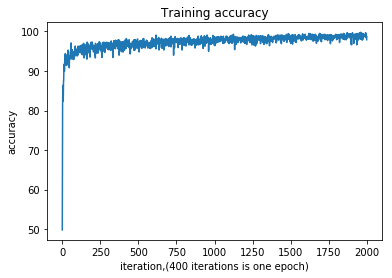

In [123]:
plt.plot(train_acc)
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration,(400 iterations is one epoch)')
print('average accuracy = ',np.mean(train_acc))

average accuracy =  97.54385


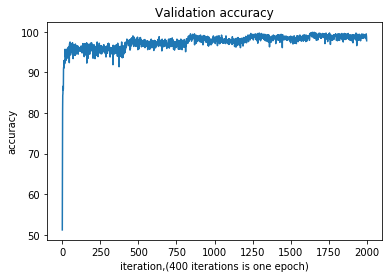

In [124]:
plt.plot(valid_acc)
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration,(400 iterations is one epoch)')
print('average accuracy = ',np.mean(valid_acc))